<a href="https://colab.research.google.com/github/FrontManShadow/heart_disease_prediction/blob/main/cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Итоговый проект по прогнозированию рисков сердечно-сосудистых заболеваний.

Датасет представляет собой .csv файл, содержащий следующие поля:

* Age (возраст);
* Sex (пол);
* Resting_blood_pressure (артериальное давление в состоянии покоя);
* Serum_cholestoral (уровень холестерина в крови mg/dl);
* Fasting_blood_sugar (анализ глюкозы в крови натощак (> 120 mg/dl));
* Maximum_heart_rate_achieved (максимальная частота сердечных сокращений);
* Exercise_induced_angina (стенокардия при нагрузке),
* Oldpeak (депрессия ST-сегмента);
* Slope (наклон пикового сегмента ST при физической нагрузке);
* Number_of_major_vessels (количество крупных сосудов (0-3), окрашенных с помощью флюороскопии);
* Resting_electrocardiographic_results (результаты электрокардиографических исследований в покое 0, 1, 2);
* Thal (3 = норма; 6 = фиксированный дефект; 7 = обратимый дефект);
* Chest_bin (боль в груди от 1 до 4).

Задачей является построить модель, предсказывающую наличие сердечно-сосудистых заболеваний.
Необходимо проанализировать данные,провести корреляционный анализ, а также обучить модели и сравнить результаты

## 1. Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from typing import Optional, List

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
# 1. Загрузка данных
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,47.832254,1,4.000000,118.418763,300.876566,0,2,161.831133,1,3.151432,2,2,7,1
599996,599996,42.106575,1,3.000000,106.110468,271.719955,0,2,178.749408,1,1.925267,2,0,7,1
599997,599997,41.579352,1,1.295676,128.896878,279.301722,0,0,175.869174,1,0.000000,1,0,7,0
599998,599998,53.716562,1,4.000000,120.061556,276.966278,0,0,171.195150,1,3.007003,2,1,3,1


In [5]:
test_df

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,600000,53.963191,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
1,600001,49.621479,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
2,600002,36.933893,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
3,600003,54.884588,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7
4,600004,71.016392,0,1.746972,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,999995,55.375600,0,3.000000,111.629089,272.110688,0,0,154.583762,0,0.000000,1,0,3
399996,999996,53.782685,1,4.000000,102.819138,285.219928,0,2,153.252226,1,0.000000,1,3,7
399997,999997,55.530874,0,2.053896,106.656515,210.870682,0,2,152.268989,1,1.719441,2,0,3
399998,999998,55.442225,1,4.000000,118.354111,280.867061,0,2,159.820939,0,0.000000,1,0,3


Так,теперь посмотрим на распределения

In [6]:
def show_hists_plot(df: pd.DataFrame, without: Optional[str] = ''):
    """
    Отображает гистограммы всех колонок, за исключением указанной в without

    Полагается, что все колонки числовые

    Parameters:
    df (pd.DataFrame): датафрейм колонки которого будут отображаться в гистаграммах.
    without (Optional[str]): колонка которую не нужно отображать

    Returns: None
    """
    for column in df:
        if column == without:
            continue
        plt.grid()
        plt.title(column)
        plt.hist(df[column])
        plt.show()

In [7]:
print(train_df.dtypes)

ID                                        int64
age                                     float64
sex                                       int64
chest                                   float64
resting_blood_pressure                  float64
serum_cholestoral                       float64
fasting_blood_sugar                       int64
resting_electrocardiographic_results      int64
maximum_heart_rate_achieved             float64
exercise_induced_angina                   int64
oldpeak                                 float64
slope                                     int64
number_of_major_vessels                   int64
thal                                      int64
class                                     int64
dtype: object


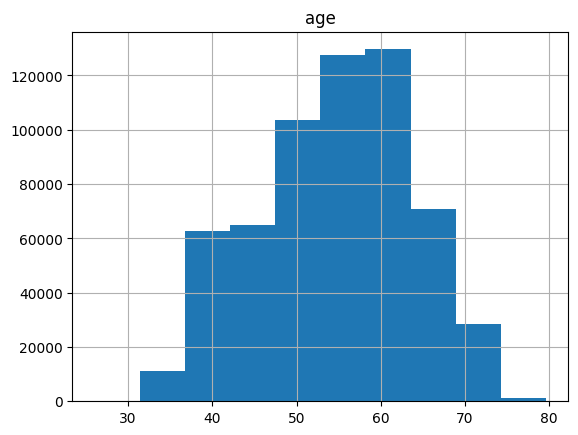

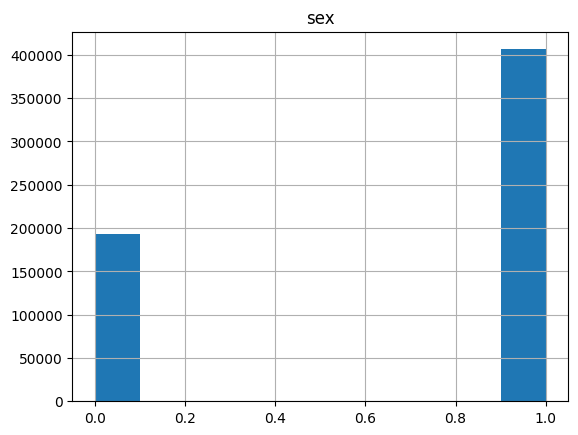

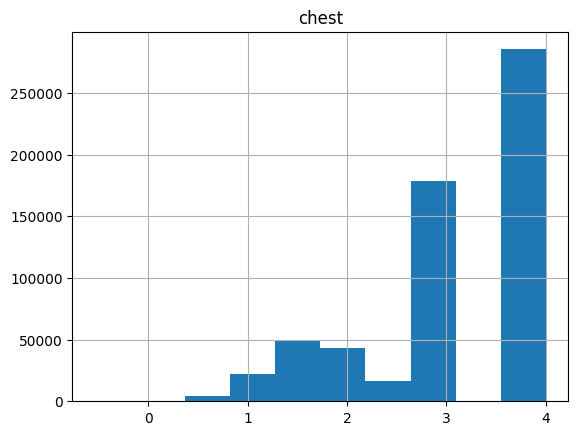

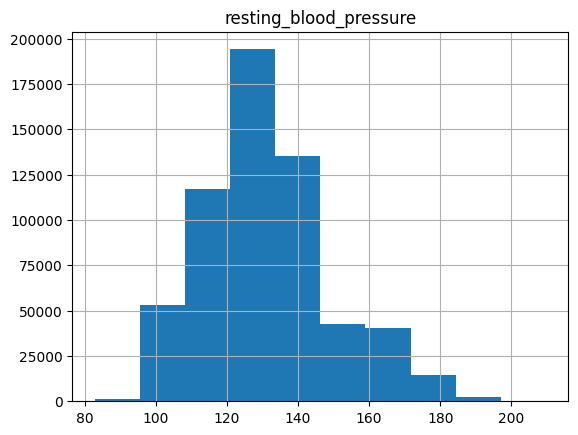

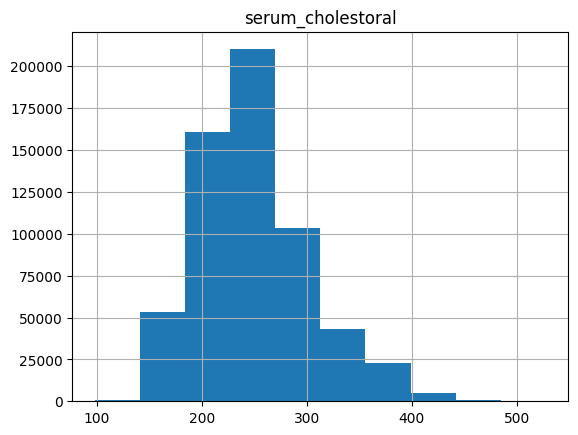

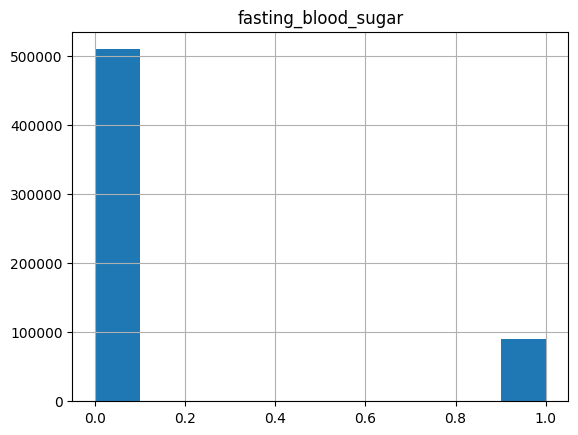

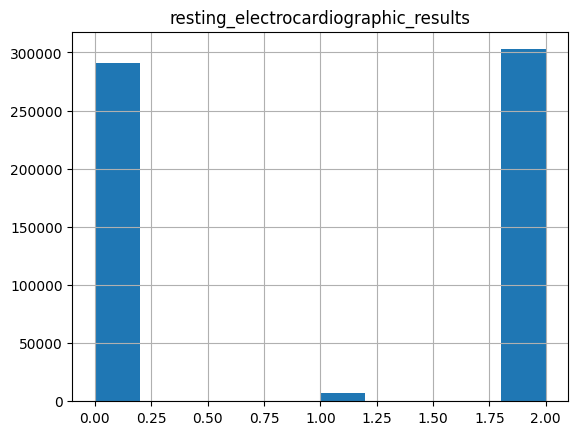

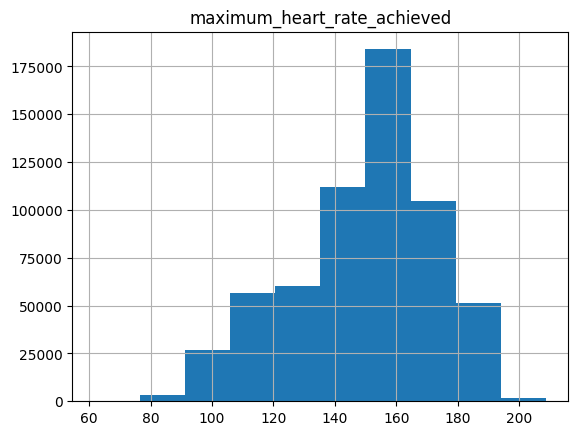

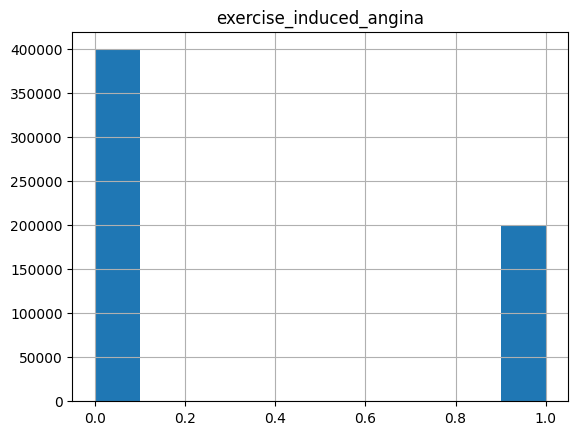

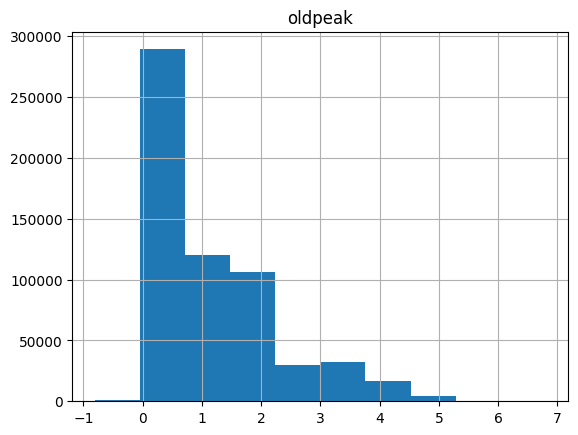

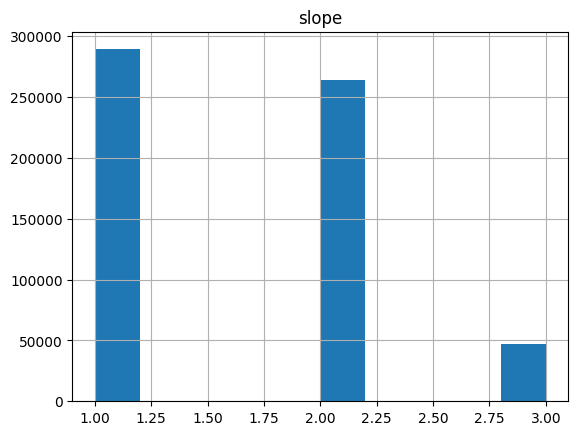

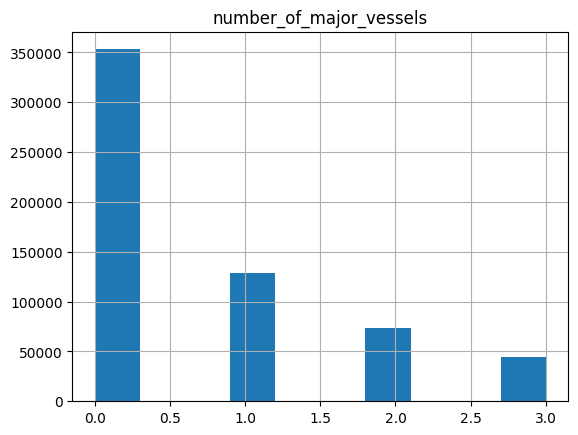

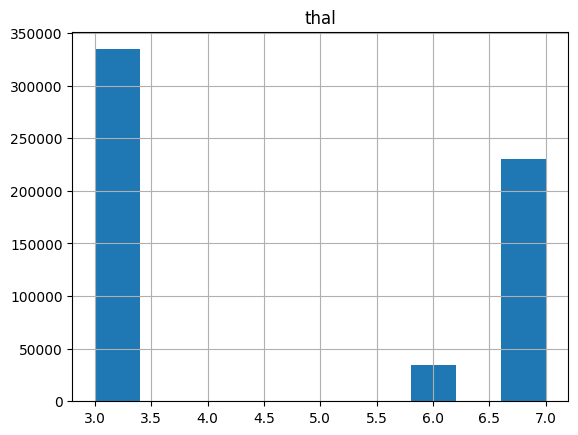

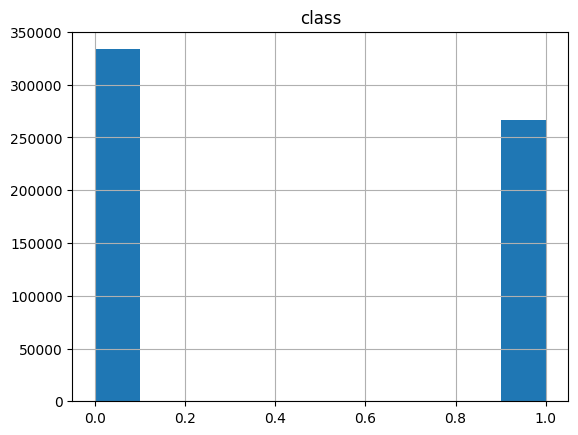

In [8]:
show_hists_plot(train_df, without='ID')

Видно,что для значений боли в груди есть не только от 1 до 4,но и промежуточные, а также значения <1. Округлим до целого

In [9]:
train_df['chest'] = train_df['chest'].round().astype(int)
# Ограничиваем диапазон
train_df = train_df[train_df['chest'].between(1, 4)]

Также видно, что для таких признаков как Age,Resting_blood_pressure,Serum_cholestoral,Maximum_heart_rate_achieved значения дробные,округлим их до целых

In [10]:
train_df.loc[:, 'age'] = train_df['age'].round().astype(int)
train_df.loc[:, 'resting_blood_pressure'] = train_df['resting_blood_pressure'].round().astype(int)
train_df.loc[:, 'serum_cholestoral'] = train_df['serum_cholestoral'].round().astype(int)
train_df.loc[:, 'maximum_heart_rate_achieved'] = train_df['maximum_heart_rate_achieved'].round().astype(int)

Посмотрим теперь на test датасет

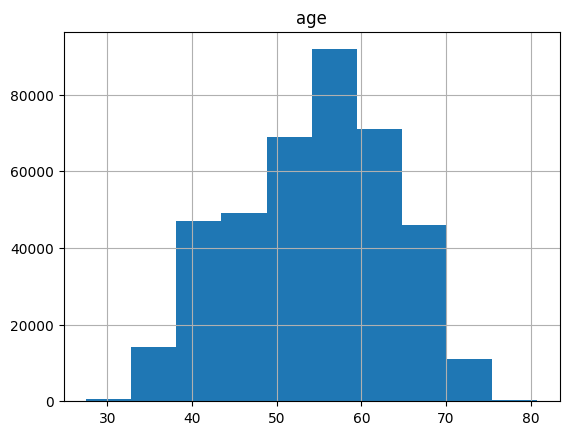

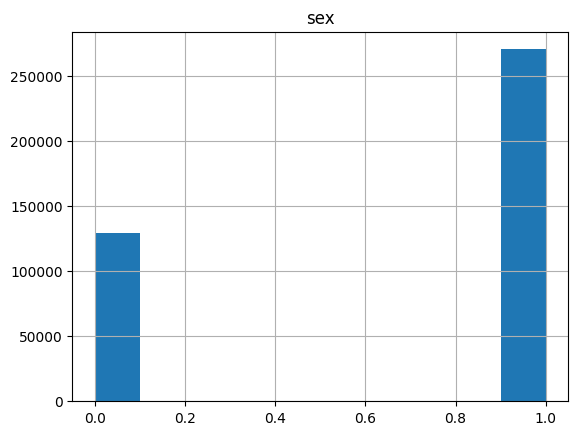

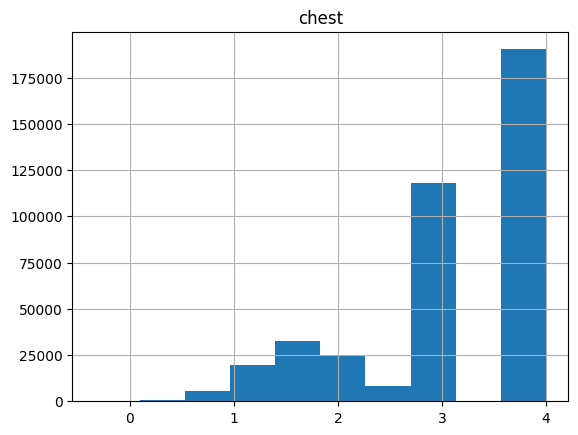

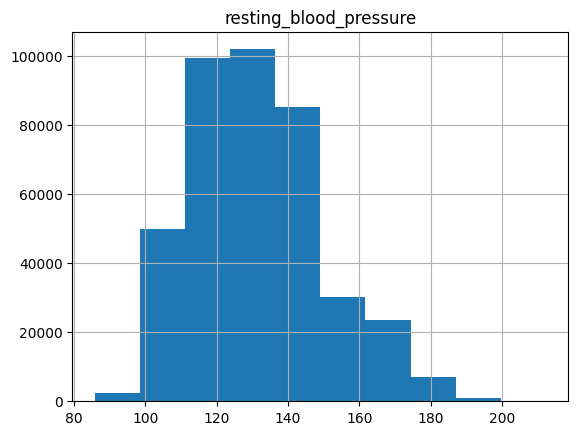

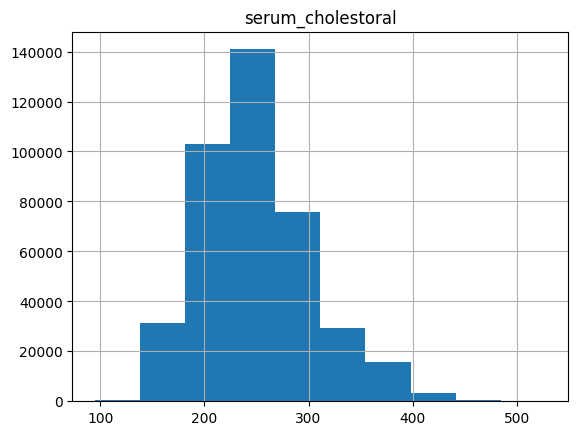

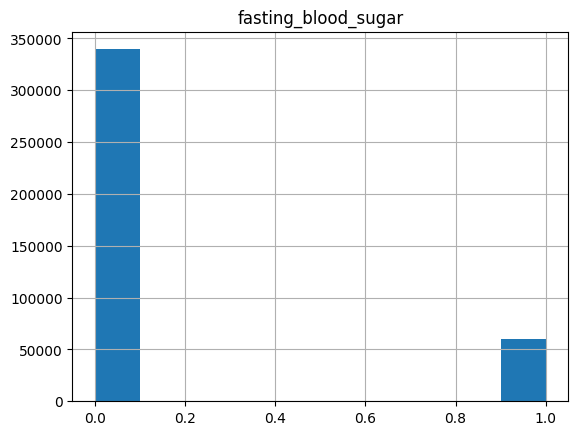

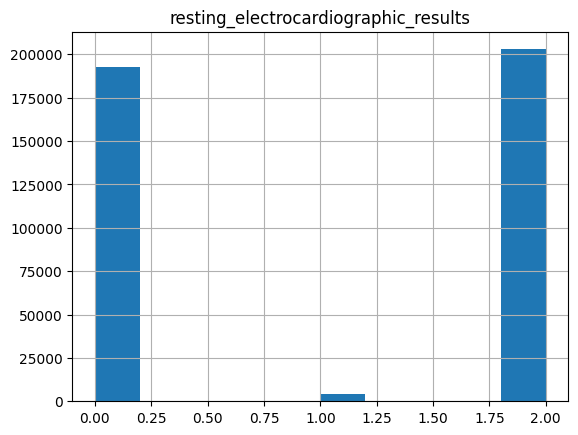

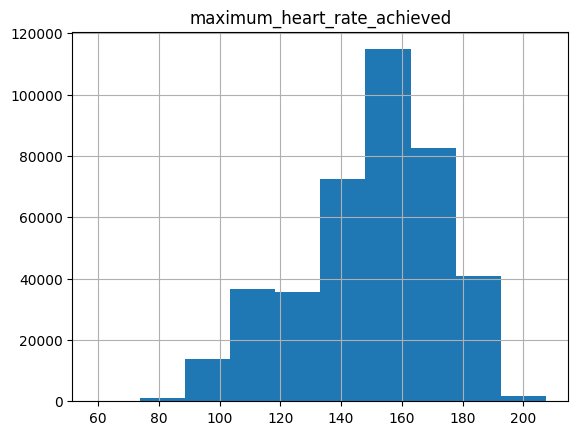

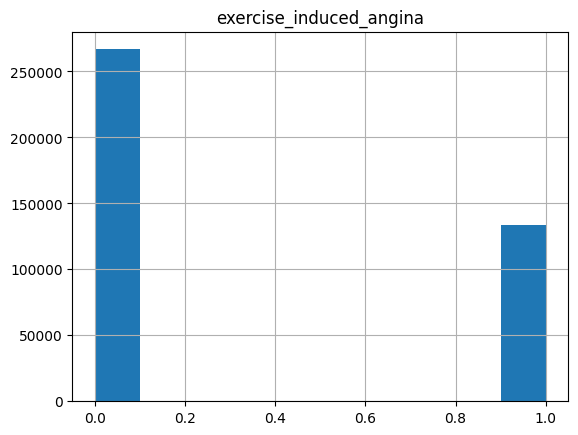

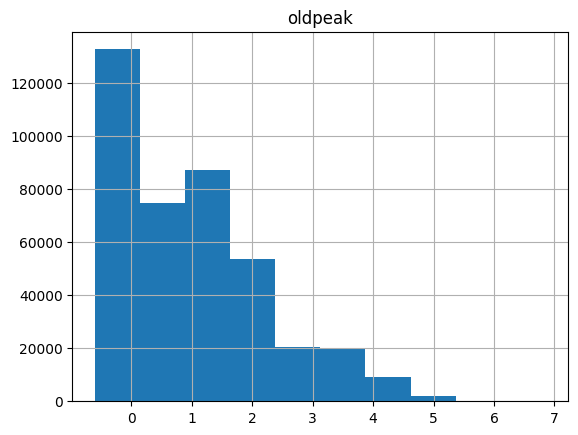

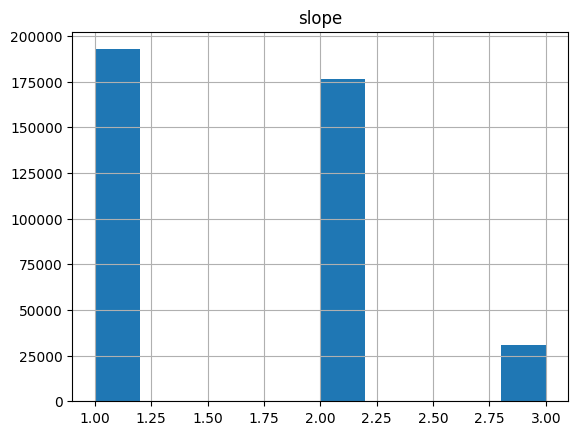

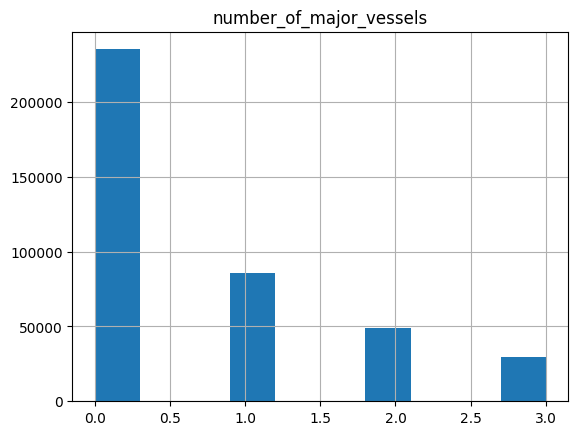

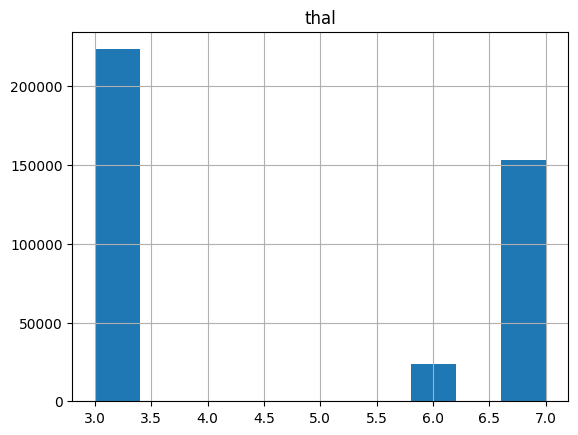

In [11]:
show_hists_plot(test_df, without='ID')

Здесь с болью в груди такая же ситуация

In [12]:
test_df['chest'] = test_df['chest'].round().astype(int)
# Ограничиваем диапазон
test_df = test_df[test_df['chest'].between(1, 4)]

И снова округлим значения

In [13]:
test_df.loc[:, 'age'] = test_df['age'].round().astype(int)
test_df.loc[:, 'resting_blood_pressure'] = test_df['resting_blood_pressure'].round().astype(int)
test_df.loc[:, 'serum_cholestoral'] = test_df['serum_cholestoral'].round().astype(int)
test_df.loc[:, 'maximum_heart_rate_achieved'] = test_df['maximum_heart_rate_achieved'].round().astype(int)

Произведем проверку на пропуски

In [14]:
test_df.isnull().sum()

,0
ID,0
age,0
sex,0
chest,0
resting_blood_pressure,0
serum_cholestoral,0
fasting_blood_sugar,0
resting_electrocardiographic_results,0
maximum_heart_rate_achieved,0
exercise_induced_angina,0


In [15]:
train_df.isnull().sum()

,0
ID,0
age,0
sex,0
chest,0
resting_blood_pressure,0
serum_cholestoral,0
fasting_blood_sugar,0
resting_electrocardiographic_results,0
maximum_heart_rate_achieved,0
exercise_induced_angina,0


Пропусков не обнаружено

Теперь выделим категориальные переменные и преобразуем в фиктивные данные

In [16]:
categorical_cols = [
    'sex',
    'fasting_blood_sugar',
    'exercise_induced_angina',
    'slope',
    'resting_electrocardiographic_results',
    'thal',
    'chest',
    'number_of_major_vessels'
]

In [17]:
train_df_2 = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df_2 = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

Выровняем датасеты по колонкам

In [18]:
train_df_2, test_df_2 = train_df_2.align(test_df_2, join='left', axis=1, fill_value=0)

In [19]:
train_df_2

,ID,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak,class,sex_1,fasting_blood_sugar_1,exercise_induced_angina_1,...,resting_electrocardiographic_results_1,resting_electrocardiographic_results_2,thal_6,thal_7,chest_2,chest_3,chest_4,number_of_major_vessels_1,number_of_major_vessels_2,number_of_major_vessels_3
0,0,49.0,163.0,181.0,148.0,0.944547,1,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,1,54.0,130.0,276.0,153.0,0.119070,0,True,False,False,...,False,True,False,False,True,False,False,False,False,False
2,2,50.0,147.0,223.0,102.0,1.616747,1,True,True,True,...,False,True,False,True,False,False,True,False,True,False
3,3,59.0,112.0,187.0,158.0,0.000000,1,True,False,True,...,False,False,False,True,False,False,True,True,False,False
4,4,51.0,138.0,238.0,173.0,1.150464,0,True,False,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,48.0,118.0,301.0,162.0,3.151432,1,True,False,True,...,False,True,False,True,False,False,True,False,True,False
599996,599996,42.0,106.0,272.0,179.0,1.925267,1,True,False,True,...,False,True,False,True,False,True,False,False,False,False
599997,599997,42.0,129.0,279.0,176.0,0.000000,0,True,False,True,...,False,False,False,True,False,False,False,False,False,False
599998,599998,54.0,120.0,277.0,171.0,3.007003,1,True,False,True,...,False,False,False,False,False,False,True,True,False,False


In [20]:
test_df_2

,ID,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak,class,sex_1,fasting_blood_sugar_1,exercise_induced_angina_1,...,resting_electrocardiographic_results_1,resting_electrocardiographic_results_2,thal_6,thal_7,chest_2,chest_3,chest_4,number_of_major_vessels_1,number_of_major_vessels_2,number_of_major_vessels_3
0,600000,54.0,137.0,237.0,144.0,0.711100,0,True,False,True,...,False,True,False,True,False,False,True,False,True,False
1,600001,50.0,122.0,227.0,112.0,0.000000,0,True,False,True,...,False,True,False,True,False,False,True,True,False,False
2,600002,37.0,128.0,351.0,178.0,0.313078,0,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,600003,55.0,125.0,250.0,153.0,0.308277,0,True,False,False,...,False,False,False,True,False,True,False,True,False,False
4,600004,71.0,121.0,211.0,165.0,1.021370,0,False,False,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,999995,55.0,112.0,272.0,155.0,0.000000,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
399996,999996,54.0,103.0,285.0,153.0,0.000000,0,True,False,True,...,False,True,False,True,False,False,True,False,False,True
399997,999997,56.0,107.0,211.0,152.0,1.719441,0,False,False,True,...,False,True,False,False,True,False,False,False,False,False
399998,999998,55.0,118.0,281.0,160.0,0.000000,0,True,False,False,...,False,True,False,False,False,False,True,False,False,False


Тк oldpeak (депрессия ST-сегмента) является числовым признаком с дробной частью,то полезно будет сделать масштабирование

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [22]:
train_df_2['oldpeak'] = imputer.fit_transform(train_df_2[['oldpeak']])
test_df_2['oldpeak'] = imputer.transform(test_df_2[['oldpeak']])

Масштабируем числовые признаки включая oldpeak

In [23]:
int_cols = ['age', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved']

In [24]:
from sklearn.preprocessing import StandardScaler
num_cols = int_cols + ['oldpeak']
scaler = StandardScaler()
train_df_2[num_cols] = scaler.fit_transform(train_df_2[num_cols])
test_df_2[num_cols] = scaler.transform(test_df_2[num_cols])

## Анализ данных

Для начала построим корреляционную матрицу

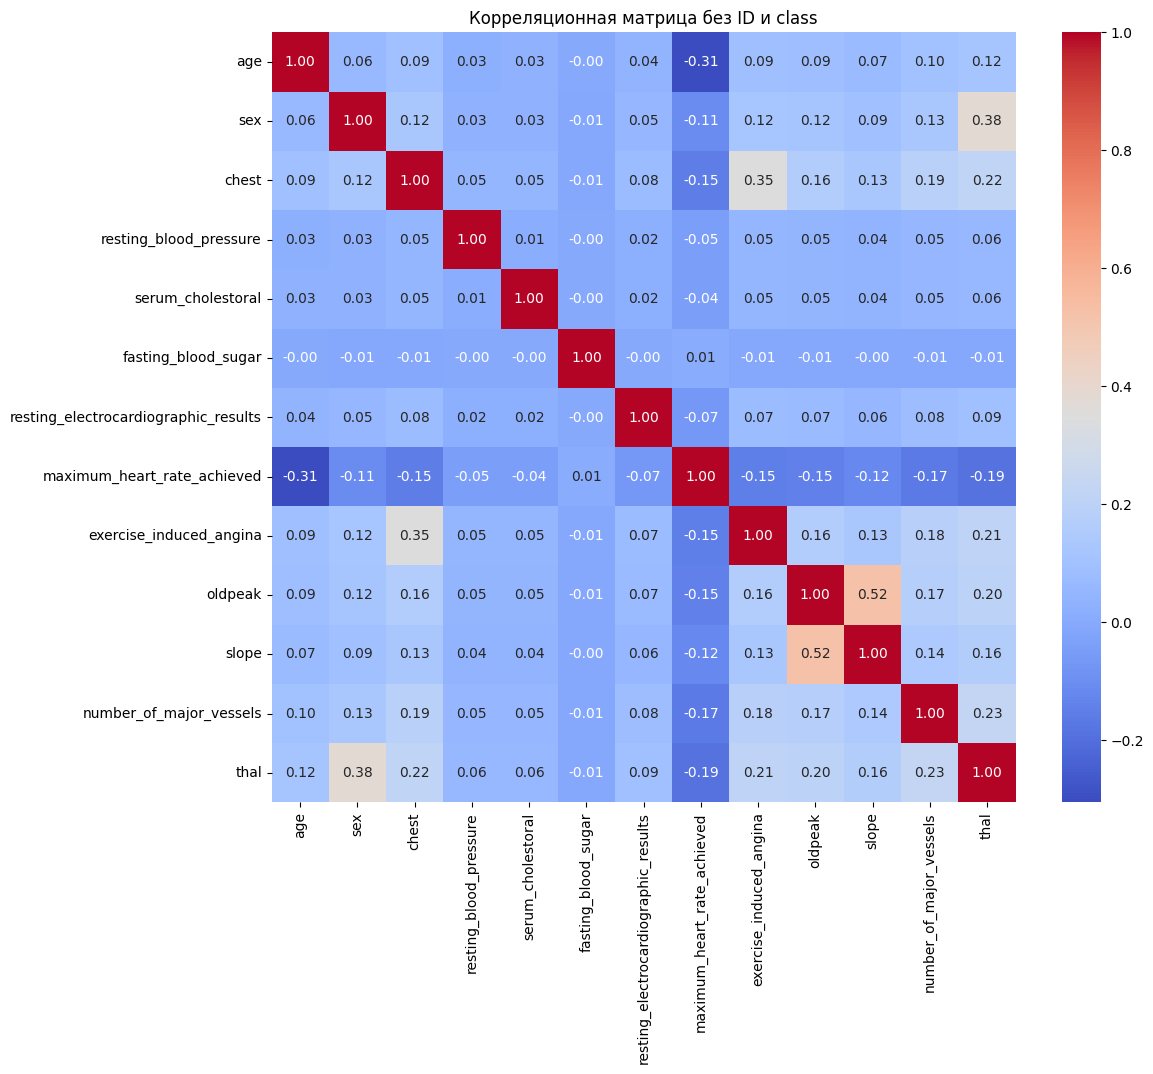

In [25]:
corr_df = train_df.drop(columns=['ID', 'class'])
correlation_matrix = corr_df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица без ID и class")
plt.show()

Исходя из матрицы можно сделать вывод о том,что возраст, депрессия ST-сегмента (oldpeak), стенокардия при нагрузке (exercise_induced_angina), наклон ST-сегмента (slope) и количество пораженных сосудов (number_of_major_vessels) имеют положительные корреляции друг с другом и с болью в груди (chest), что предполагает их важную роль в развитии сердечно-сосудистых заболеваний

Теперь произведем оценку выбросов

In [26]:
# Список числовых переменных
numerical_cols = [
    'age',
    'resting_blood_pressure',
    'serum_cholestoral',
    'maximum_heart_rate_achieved',
    'oldpeak'
]


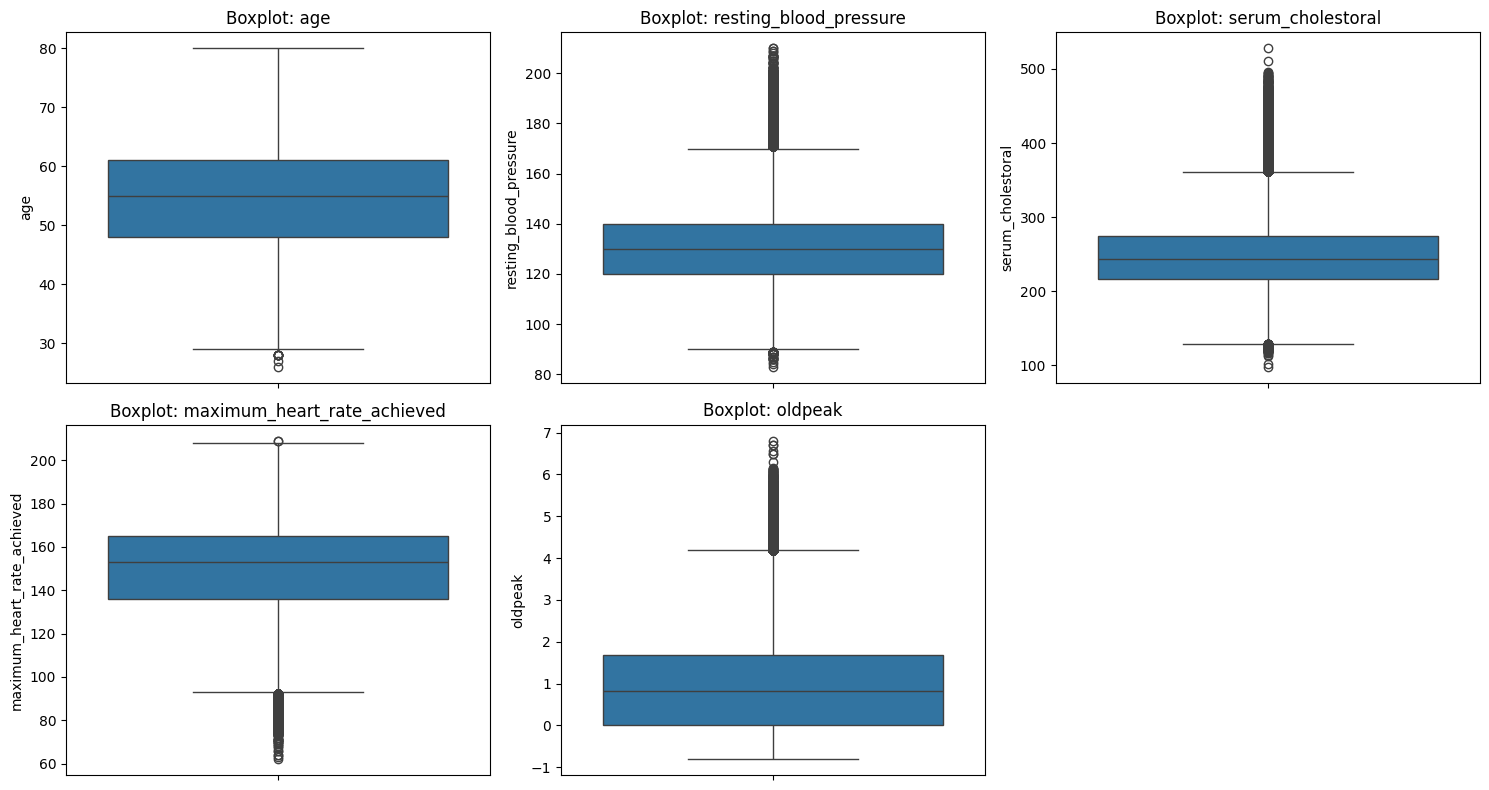

In [27]:
# Ящик с усами по каждому признаку
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=train_df, y=col)
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

Исходя из боксплотов можно сделать вывод о том,что в выборке есть пациенты, которые находятся в группе риска сердечно-сосудистых заболеваний (пожилой возраст, повышенное артериальное давление, высокий уровень холестерина,низкая максимальная частота сердечных сокращений, высокая депрессия ST-сегмента). Также графики "age" и "maximum_heart_rate_achieved" показывают более нормальное распределение, чем другие переменные.

## Обучение моделей

Теперь займемся обучением моделей Logistic Regression,Randomforest, Neural Network и сравним результаты

In [28]:
from sklearn.model_selection import train_test_split
# Подготовка X и y
y = train_df_2['class']
# Уберём 'class' и 'ID'
X = train_df_2.drop(columns=['class', 'ID'], errors='ignore')
#Разделим train для оценки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# 4. Подготовка X_test с той же структурой признаков
train_cols = X_train.columns  # сохраняем порядок и имена признаков
X_test = test_df_2.drop(columns=['ID'], errors='ignore')
X_test = X_test[train_cols]  # выравниваем под обучающие признаки

Для начала посмотрим на первую модель - Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
print("Logistic Regression accuracy:", accuracy_score(y_val, y_pred_lr))

Logistic Regression accuracy: 0.8878141196304425


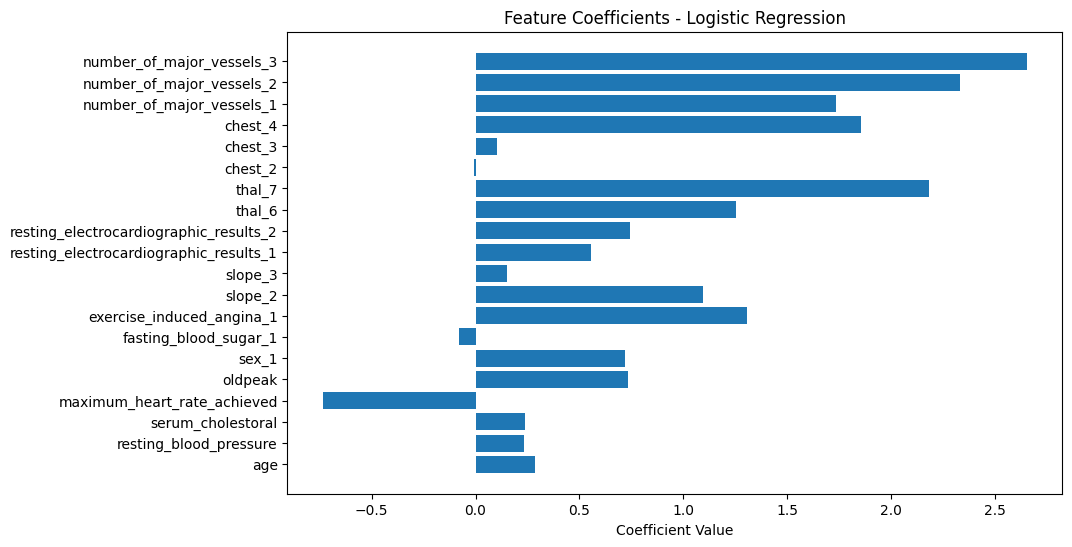

In [30]:
coef = lr.coef_[0]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, coef)
plt.title("Feature Coefficients - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.show()

Наиболее значимыми признаками являются количество крупных сосудов (0-3), окрашенных с помощью флюороскопии,thal, который показывает состояние кровотока в сердце,и боль в груди.

Теперь рандом форест

In [31]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print("Random Forest accuracy:", accuracy_score(y_val, y_pred_rf))

Random Forest accuracy: 0.8959096637428121


Построим график важности признаков

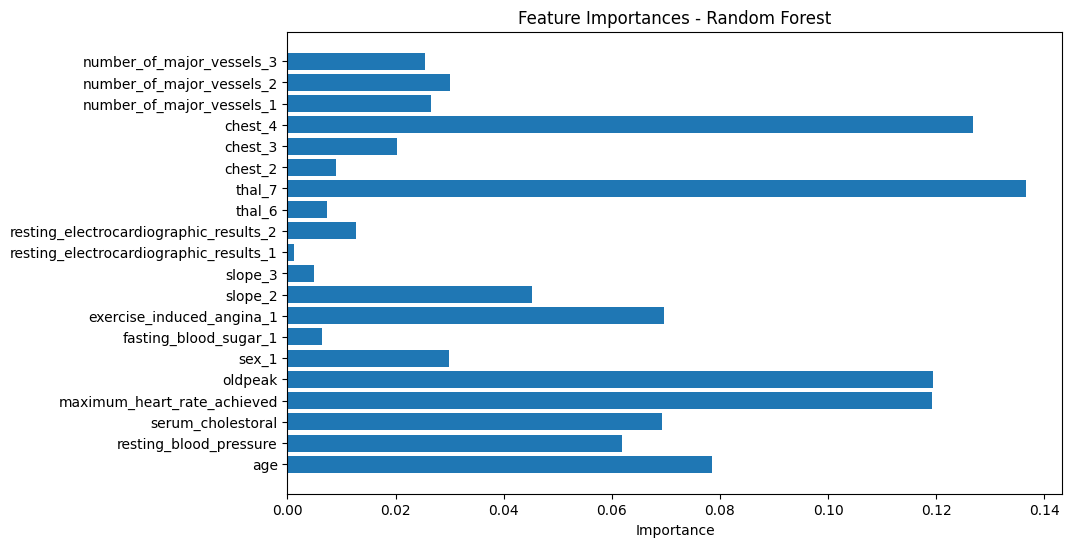

In [32]:
importances = rf.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.show()

Одними из самых важных признаков судя по графику являются thal, который показывает состояние кровотока в сердце,а также боль в груди и депрессия ST-сегмента.Это подтверждает их клиническую значимость и значит, что модель учится на действительно значимых факторах.

А также Neural Network

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [34]:
print(X_train.dtypes)

age                                       float64
resting_blood_pressure                    float64
serum_cholestoral                         float64
maximum_heart_rate_achieved               float64
oldpeak                                   float64
sex_1                                        bool
fasting_blood_sugar_1                        bool
exercise_induced_angina_1                    bool
slope_2                                      bool
slope_3                                      bool
resting_electrocardiographic_results_1       bool
resting_electrocardiographic_results_2       bool
thal_6                                       bool
thal_7                                       bool
chest_2                                      bool
chest_3                                      bool
chest_4                                      bool
number_of_major_vessels_1                    bool
number_of_major_vessels_2                    bool
number_of_major_vessels_3                    bool


In [35]:
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

In [36]:
print(X_train.dtypes.value_counts())

float32    20
Name: count, dtype: int64


In [37]:
# 1. Преобразуем данные в тензоры
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_val_t = torch.tensor(X_val.values, dtype=torch.float32)
y_val_t = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

In [38]:
# 2. Создаем Dataset и DataLoader
train_ds = TensorDataset(X_train_t, y_train_t)
val_ds = TensorDataset(X_val_t, y_val_t)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_ds, batch_size=32, num_workers=2)

In [39]:
# 3. Определим модель
class HeartNet(nn.Module):
    def __init__(self, input_dim):
        super(HeartNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HeartNet(X_train.shape[1]).to(device)

In [40]:
# 4. Настройка обучения
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.002, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

In [41]:
num_epochs = 10
train_losses = []
val_losses = []
val_accuracies = []
patience = 5  # Количество эпох без улучшения
best_val_loss = float('inf')  # Лучшая валидационная потеря (изначально - бесконечность)
epochs_no_improve = 0         # Счетчик эпох без улучшения
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        output = model(xb)
        loss = criterion(output, yb)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Валидация
    model.eval()
    total_val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            output = model(xb)
            loss = criterion(output, yb)
            total_val_loss += loss.item()

            preds = (output > 0.5).float()
            correct += (preds == yb).sum().item()
            total += yb.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    scheduler.step(avg_val_loss)
    val_losses.append(avg_val_loss)
    val_acc = correct / total
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, Val Loss={avg_val_loss:.4f}, Val Acc={val_acc:.4f}")
     # --- Early Stopping ---
    if avg_val_loss < best_val_loss:
       best_val_loss = avg_val_loss  # Обновляем лучшую loss
       epochs_no_improve = 0           # Сбрасываем счетчик
       torch.save(model.state_dict(), 'best_model.pth') # Сохраняем веса лучшей модели
    else:
       epochs_no_improve += 1  # Увеличиваем счетчик
       if epochs_no_improve == patience:
           print('Early stopping!')
           # Загружаем лучшие веса модели
           model.load_state_dict(torch.load('best_model.pth'))
           break  # Останавливаем обучение


Epoch 1: Train Loss=0.2778, Val Loss=0.2591, Val Acc=0.8924
Epoch 2: Train Loss=0.2714, Val Loss=0.2580, Val Acc=0.8941
Epoch 3: Train Loss=0.2706, Val Loss=0.2583, Val Acc=0.8936
Epoch 4: Train Loss=0.2707, Val Loss=0.2590, Val Acc=0.8934
Epoch 5: Train Loss=0.2704, Val Loss=0.2579, Val Acc=0.8929
Epoch 6: Train Loss=0.2705, Val Loss=0.2569, Val Acc=0.8926
Epoch 7: Train Loss=0.2700, Val Loss=0.2568, Val Acc=0.8939
Epoch 8: Train Loss=0.2703, Val Loss=0.2559, Val Acc=0.8943
Epoch 9: Train Loss=0.2702, Val Loss=0.2545, Val Acc=0.8950
Epoch 10: Train Loss=0.2700, Val Loss=0.2558, Val Acc=0.8943


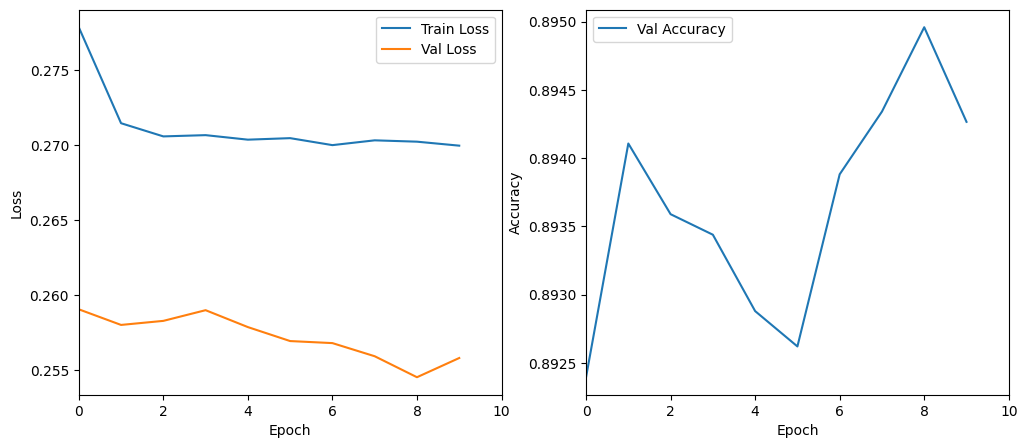

In [42]:
# 6. Графики обучения
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.xlim(0, 10)

plt.subplot(1,2,2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0, 10)
plt.show()

Разрыв между потерями на тренировочном и валидационном наборах данных (Train Loss ниже Val Loss) может указывать на небольшое переобучение, однако в целом сеть учится и предсказывает тренировочные данные

Сравним результаты трех моделей

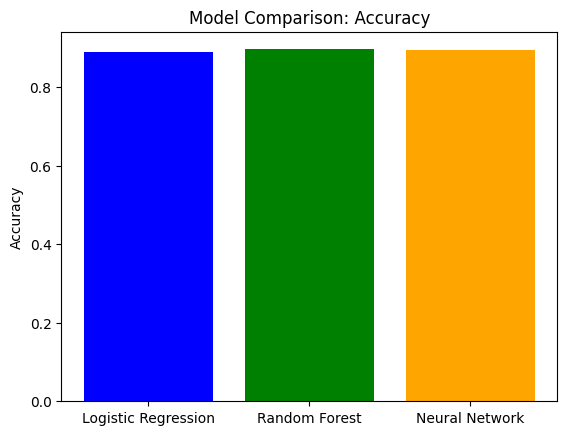

In [50]:

models = ['Logistic Regression', 'Random Forest', 'Neural Network']
accuracies = [0.8878, 0.8959, 0.8943]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.show()


Можно сделать вывод о том, что **Random Forest** оказался лучшей моделью по точности. Нейронная сеть даёт похожие результаты, но возможно из-за переобучения или недостаточной настройки её результаты по точности чуть хуже.Логистическая регрессия,в свою очередь, является базовой моделью, которая не даёт наилучших результатов, но может быть полезной в случае быстрых тестов или для более простых задач.

## Инференс на тестовых данных

In [43]:
model.eval()
X_test_t = torch.tensor(X_test.values, dtype=torch.float32)
with torch.no_grad():
    inputs = torch.tensor(X_test.values, dtype=torch.float32).to(device)
    outputs = model(inputs)
    predictions = (outputs.cpu().numpy() > 0.5).astype(int)

In [44]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [45]:
submission = pd.read_csv("sample_submission.csv")
submission

,ID,class
0,600000,0
1,600001,0
2,600002,0
3,600003,0
4,600004,0
...,...,...
399995,999995,0
399996,999996,0
399997,999997,0
399998,999998,0


In [46]:
print("submission shape:", submission.shape)
print("X_test shape:", X_test.shape)
print("predictions shape:", predictions.shape)

submission shape: (400000, 2)
X_test shape: (399421, 20)
predictions shape: (399421, 1)


In [47]:
# Убедимся, что predictions одномерный
preds_flat = predictions.reshape(-1) if hasattr(predictions, 'reshape') else predictions.flatten()

submission = pd.DataFrame({
    'ID': test_df_2['ID'].values[:len(preds_flat)],  # 399421 строк
    'class': preds_flat
})

submission.to_csv("submission.csv", index=False)

In [48]:
print(submission.shape)
print(submission.head())

(399421, 2)
       ID  class
0  600000      1
1  600001      1
2  600002      0
3  600003      0
4  600004      0


In [49]:
submission

,ID,class
0,600000,1
1,600001,1
2,600002,0
3,600003,0
4,600004,0
...,...,...
399416,999995,0
399417,999996,1
399418,999997,0
399419,999998,0
